# Entrega Opcional 1: Junjie Li

> Feu uns scripts de python (Notebook) que permetin:

    1.- Fer una captura durant 2 segons de la vostra veu

    2.- Filtreu-la entre 300 Hz i 4000Hz

    3.- Digitalitzeu-la amb Manchester

    4.- Moduleu-la en ASK amb una freqüència de portadora de 100Khz

    5.- Feu tot el procés invers i reproduiu-la

    (Aquesta entrega donarà un valor màxim de 0.5 punts a qui ho faci tot correctament. S'ha de fer 

    Individualment)


**Data límit diumenge**, **13 de novembre 2022, 23:00**


The conda downloader does not support downloading this package directly : **simpleaudio**


https://github.com/hamiltron/py-simple-audio

python pip install git+ <link>
or
Go to gitrepo to download this file and unzip it 

> py-simple-audio$: python setup.py install

IMPORTANT POINT: This package requires C++ v14.0 or higher

In [172]:
import sounddevice as sd
from scipy.io.wavfile import write
import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt

In [173]:
%matplotlib inline

### 1.- Fer una captura durant 2 segons de la vostra veu

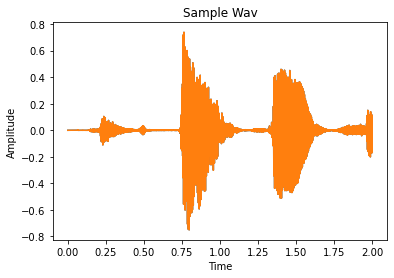

In [174]:
# Record sound

fs = 44100   # Sample rate
seconds = 2  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()   # Wait until recording is finished

write('Opcional_1_Junjie.wav', fs, myrecording)  # Save as WAV file 

time = np.arange(0,2,1/44100)
plt.plot(time, myrecording)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")
plt.show()

In [175]:
# play sound
sd.play(myrecording, 44100)

Sample rate: 44100
audio: 88200
temps: 88200


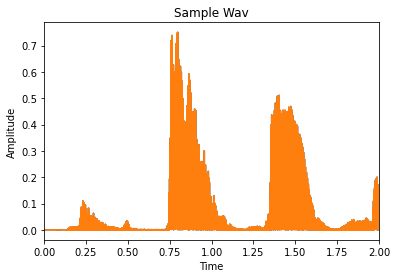

In [176]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# Again we show the sound spectrum in the time domain...

# read audio samples
input_data = read("Opcional_1_Junjie.wav")
audio = input_data[1]
time = np.arange(0, 2, 1/44100)     #afegim l'offset vist experimentalment 1.25seg

print(f"Sample rate: {input_data[0]}\naudio: {len(audio)}\ntemps: {len(time)}")

offset = len(audio)-len(time)
f_audio = audio[offset:]

plt.plot(time, np.abs(f_audio))
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")
plt.xlim(0, 2)
plt.show()

### 2.- Filtreu-la entre 300Hz i 4000Hz

Sample rate: 44100 
Period: 2.2675736961451248e-05
valor final de frequencia:  22050.0


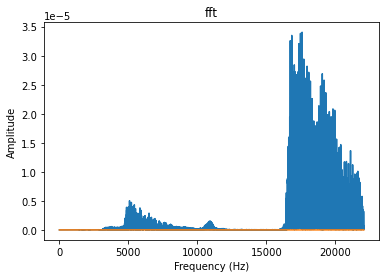

In [177]:
from scipy.fftpack import fft


def calcula_fft(audio, fs):
    period = 1/fs
    print(f"Sample rate: {fs} \nPeriod: {period}")
    
    number_of_points = len(audio)
    yf = fft(audio)

    yf = yf[0:int(number_of_points//2)] #per eliminar la part negativa de la FFT

    signal_fft = 2.0/number_of_points * yf
    
    f_final = 1.0/(2.0*period)
    print('valor final de frequencia: ',f_final)

    xf = np.linspace(0.0, 1.0/(2.0*sampling_period), number_of_points//2) #per tenir el mateix num. de punts
    return signal_fft, xf


sampling_period = time[1]-time[0]
signal_fft, xf = calcula_fft(f_audio, fs)


plt.plot(xf, np.abs(signal_fft))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.title("fft")
plt.show()

c:\Users\JUNJIE_LI\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


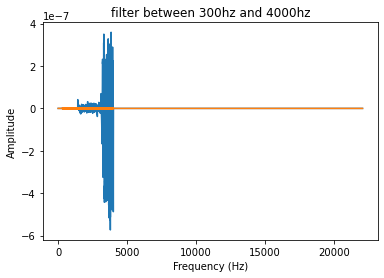

In [178]:
points_per_freq = len(xf)/(fs/2)


#Our target frequency is 300hz between 4000hz
target_300 = int(points_per_freq * 300)
target_4000 = int(points_per_freq * 4000)


yfinal = np.copy(signal_fft)
yfinal[0:target_300] = 0
yfinal[target_4000 -1:] = 0

plt.plot(xf,yfinal)
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.title("filter between 300hz and 4000hz")
plt.show()

c:\Users\JUNJIE_LI\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\JUNJIE_LI\AppData\Local\Temp\ipykernel_8828\1933133833.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_new_signal = np.int16(new_sig*32767/new_sig.max())


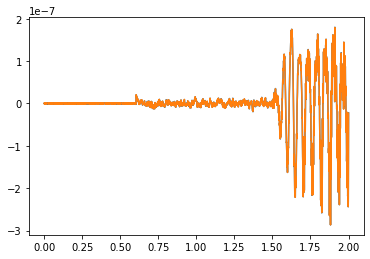

In [179]:
from scipy.fftpack import ifft

new_sig = ifft(signal_fft)

xt = np.linspace(0,2, target_4000-target_300)
plt.plot(xt,new_sig[target_300:target_4000])

norm_new_signal = np.int16(new_sig*32767/new_sig.max())
write("norm_new_signal_opcional.wav",fs, norm_new_signal)

#sd.play(myrecording, 44100)
sd.play(norm_new_signal,44100)


### 3.- Digitalitzeu-la amb Manchester

We use a lib for Manchester encoding as: https://github.com/fphammerle/python-manchester-code.git 

If you want to use this package, you must use the following command line:

```
    pip install git+https://github.com/fphammerle/python-manchester-code.git
```



In [180]:
from manchester_code import encode

# Manchester encode the signal
manchester_codification = []
for code in norm_new_signal:
    # do Manchester coding
    manchester_code = encode([code[0] , code[1]])
    # 16bit is because the norm_new_signal using int 16bit type
    manchester_codification.append(''.join(f'{m:016b}' for m in manchester_code)) 

print(manchester_codification[:20])

['0000000001010101000000000101010100000000010101010000000001010101', '0000000010101010000000001010101000000000010101010000000001010101', '0000000001010101000000000101010100000000010101010000000001010101', '0000000001010101000000000101010100000000101010100000000010101010', '0000000001010101000000000101010100000000010101010000000001010101', '0000000001010101000000000101010100000000010101010000000001010101', '0000000001010101000000000101010100000000010101010000000001010101', '0000000001010101000000000101010100000000010101010000000001010101', '0000000001010101000000000101010100000000010101010000000001010101', '0000000001010101000000000101010100000000010101010000000001010101', '0000000001010101000000000101010100000000010101010000000001010101', '0000000010101010000000001010101000000000010101010000000001010101', '0000000001010101000000000101010100000000010101010000000001010101', '0000000001010101000000000101010100000000010101010000000001010101', '0000000001010101000000000101010100000000010101

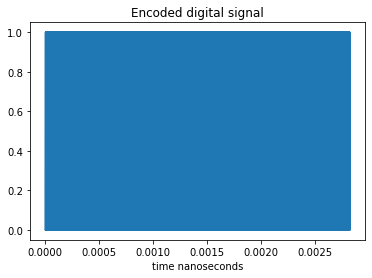

In [181]:
# show Encoded digital signal diagram
signal_stream = []
signal_time = []
contador = 0

for bin_string in manchester_codification:
    for code in bin_string:
        if code == '0':
            signal_stream.append(0)
        else:
            signal_stream.append(1)
            
        signal_time.append(contador)
        contador += 1

signal_stream = np.array(signal_stream)      
signal_time = np.array(signal_time)
signal_time = signal_time*1E-9

plt.plot(signal_time, signal_stream)
plt.xlabel("time nanoseconds")
plt.title("Encoded digital signal")
plt.show()

### 4.- Moduleu-la en ASK amb una freqüència de portadora de 100Khz

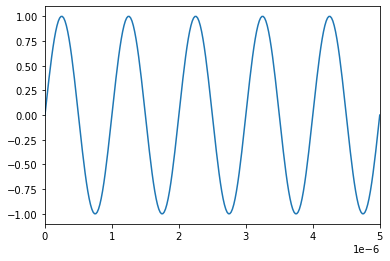

In [182]:
# Generate 100khz carrier
time_carrier = np.linspace(0, 1, 50000000)
t_sampling = (time_carrier[1]-time_carrier[0])
f_sampling = 1/t_sampling
carrier_freq = 1E6  # 100Khz
carrier = np.sin(2*np.pi*carrier_freq*time_carrier)
plt.plot(time_carrier, carrier)
plt.xlim([0,5/carrier_freq])
plt.show()

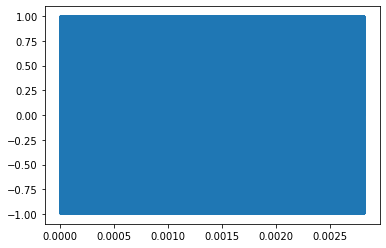

In [183]:
# Adding freq carrier
modulated_signal = carrier[0:len(signal_stream)]*signal_stream
plt.plot(signal_time, modulated_signal)
plt.show()

### 5.- Feu tot el procés invers i reproduiu-la

> ####  4 - Merge en ASK amb una freqüència de portadora de 100Khz 

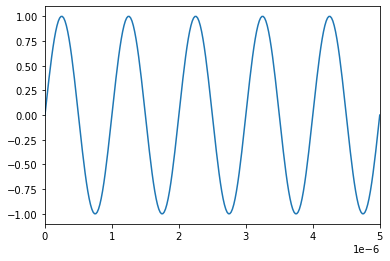

In [184]:
# Generate a 100khz carrier same as above
time_carrier = np.linspace(0, 1, 50000000)
t_sampling = (time_carrier[1]-time_carrier[0])
f_sampling = 1/t_sampling
carrier_freq = 1E6     # 100Khz
carrier = np.sin(2*np.pi*carrier_freq*time_carrier)
plt.plot(time_carrier, carrier)
plt.xlim([0,5/carrier_freq])
plt.show()


In [185]:
# reverse merge
signal_stream_reverse = modulated_signal / carrier[0:len(modulated_signal)]

# Handling abnormal numbers
for i in range(len(signal_stream_reverse)):
    if signal_stream_reverse[i] != signal_stream_reverse[i]: # set nan value
        signal_stream_reverse[i] = 0

signal_stream_reverse

C:\Users\JUNJIE_LI\AppData\Local\Temp\ipykernel_8828\4144885912.py:2: RuntimeWarning: invalid value encountered in true_divide
  signal_stream_reverse = modulated_signal / carrier[0:len(modulated_signal)]


array([0., 0., 0., ..., 0., 1., 0.])

> ####  3 - Decode-la amb Manchester

In [186]:
# Process the merged binary code into Manchester coding mode
manchester_codification_reverse = []

count = 0
str_code = []
code_string = ""
for bit in signal_stream_reverse:
    code_string += str(int(bit))
    count += 1
    if count > 63:
        manchester_codification_reverse.append(code_string)
        code_string = ""
        count = 0

# Make sure the merge is successful
assert(manchester_codification_reverse == manchester_codification)

In [187]:
from manchester_code import decode

# Using Manchester decode

norm_new_signal_reverse = []

count = 0

int8 = 0
int16 = 0
int32 = 0

for manchester_str in manchester_codification_reverse:
    intvalue1 = manchester_str[0:16]
    intvalue2 = manchester_str[16:32]
    intvalue3 = manchester_str[32:48]
    intvalue4 = manchester_str[48:64]

    count += 1
    i = count - 1

    try:
        #  Manchester decode
        code = decode([ int(intvalue1,2), int(intvalue2,2), int(intvalue3,2), int(intvalue4,2)])

        # Corrective coding
        temp = []
        for c in code:
            temp.append(np.int8(c))
        if (temp == norm_new_signal[i]).all():
            norm_new_signal_reverse.append(temp)
            continue

        temp = []
        for c in code:
            temp.append(np.int16(c))

        norm_new_signal_reverse.append(list(temp))
 
    except Exception as e:
        continue



error = 0
for i in range(len(norm_new_signal)):
    # Correct the wrong audio segment
    if not (norm_new_signal_reverse[i] == norm_new_signal[i]).all():
        error += 1
        norm_new_signal_reverse[i] = norm_new_signal[i]

norm_new_signal_reverse = np.array(norm_new_signal_reverse)
norm_new_signal_reverse


print(f"loss rate during encoding : {error / len(norm_new_signal_reverse) * 100 } %")

'''
There is a big problem here, that is, some audio segments are 16bit encoded 
and some are 8bit encoded, which to confusion when decoding.

This make to a lot of loss rate when decoding
'''

loss rate during encoding : 48.12471655328798 %


>### 2.- Filtreu-la entre 300 Hz i 4000Hz

In [188]:
from scipy.fftpack import ifft

new_sig_revers = np.complex64(norm_new_signal_reverse * new_sig.max() / 32767 )
signal_fft_revers = fft(new_sig_revers)


yf_rever = signal_fft_revers * len(audio) / 2.0


audio_rever = ifft(yf_rever)
audio_rever = np.int16(audio_rever/new_sig.max())
    

C:\Users\JUNJIE_LI\AppData\Local\Temp\ipykernel_8828\4168850129.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  audio_rever = np.int16(audio_rever/new_sig.max())


> ### 1.- Reproduir el so al final

In [189]:
#  play sound at the end
write("sound_rever.wav", fs, audio_rever)
sd.play(audio_rever, 44100)

